### `Author: Firas Ali Obeid`

### [Personal Flask WebApp](https://firobeid.pythonanywhere.com/)


# HTML & PDF Web Scrapper
* Scrapes HTML Articles
* Scrapes Online PDFs
* Scrapes HTML hosting many PDFs

### Results: 
NLP of concatenated articles in one big corpus to get:
- Most frequent tokens (key words)
- Most Frequent Ngrams
- Name Entity Recognition of concatenated texts

### Package Installlations Requirements:

`pip install nltk  - > Natural Language toolkit library`

`pip install re - >  Regular expression package`

`pip install PyPDF2 - > Read and parse your content pdf`

`pip install requests - > request for get the pdf`

`pip install bs4 - > for parse the html and find all url hrf with ".pdf" final`

`pip install -U pyopenssl  - > provide a full support of OpenSSL lib`

`pip install splinter - > loads webpages in the browser`

`pip install webdriver_manager - >automates the browser setup in the Selenium code`

`pip install spacy - >  build information extraction or natural language understanding systems`

`pip install matplotlib - >  visualization library`

`pip install wordcloud - >  visualize key word frequency`

`python -m spacy download en_core_web_sm - > spaCy library language model`


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import nltk 
import sys
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import json
from PyPDF2 import PdfFileReader
import io
import warnings
import spacy
from spacy import displacy
#!python -m spacy download en_core_web_sm
warnings.filterwarnings("ignore")

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fobeid001\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fobeid001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fobeid001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fobeid001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fobeid001\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\fobeid001\.wdm\drivers\chromedriver\win32\99.0.4844.51]


### Links Pass In:

* Fill `entity` with the name that the results excel file will be saved in
* Fill `PDFs` with the links od PDF files online
* Fill `html_pages` with the links of the html articles
* Fill `multiple_PDFs` with the links that have multiple PDFs on there site
* Leave `all_links`empty

Below is a few examples:

In [3]:
all_links = []
entity = "Global"
multiple_PDFs = ["https://www.gov.uk/government/publications/draft-online-safety-bill",
                "https://www.gov.uk/government/publications/draft-online-safety-bill"]
PDFs = ["https://www.ivir.nl/publicaties/download/NetzDG_Tworek_Leerssen_April_2019.pdf",
       "https://publications.parliament.uk/pa/jt5802/jtselect/jtonlinesafety/129/129.pdf",
       "https://www.esafety.gov.au/sites/default/files/2021-09/eSafety%20Industry%20Codes%20Position%20Paper.pdf"]
html_pages = ["https://www.kempitlaw.com/upcoming-platform-regulation-the-eus-digital-services-act-and-the-uks-online-harms-bill/",
             "https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A52021PC0206",
             "https://www.theguardian.com/technology/2021/dec/15/uk-parliament-pushes-back-on-the-online-safety-bill"]

## Page with many PDF links

In [4]:
if len(multiple_PDFs) > 0:
    i = 0
    while i < len(multiple_PDFs):    
        url=requests.get(multiple_PDFs[i])
        soup = BeautifulSoup(url.content,"lxml")
        #loop over each pdf found on the same URL
        for a in soup.find_all('a', href=True):
            pages = []
            mystr= a['href']
            if(mystr[-4:]=='.pdf'):
                print ("url with pdf final:", a['href'])
                urlpdf = a['href']
                response = requests.get(urlpdf)
                with io.BytesIO(response.content) as f:
                    pdf = PdfFileReader(f)
                    information = pdf.getDocumentInfo()
                    number_of_pages = pdf.getNumPages()
    #                 txt = f"""
    #                 Author: {information.author}
    #                 Creator: {information.creator}
    #                 Producer: {information.producer}
    #                 Subject: {information.subject}
    #                 Title: {information.title}
    #                 Number of pages: {number_of_pages}
    #                 """
                    # Here the metadata of your pdf
    #                 print(txt)
                    # numpage for the number page
                    numpage=number_of_pages
                    j=0
                    while j < numpage:
                        page = pdf.getPage(j)
                        page_content = page.extractText()
                        # print the content in the pages            
    #                     print(page_content)
                        pages.append(page_content)
                        j+=1

                all_links.append({"URL":multiple_PDFs[i],
                                  "Scraped": pages})

        i +=1
                          
        

url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985033/Draft_Online_Safety_Bill_Bookmarked.pdf
url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985033/Draft_Online_Safety_Bill_Bookmarked.pdf
url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985030/Delegated_Powers_Memorandum_Web_Accessible.pdf
url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985030/Delegated_Powers_Memorandum_Web_Accessible.pdf
url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985031/Explanatory_Notes_Accessible.pdf
url with pdf final: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/985031/Explanatory_Notes_Accessible.pdf
url with pdf final: ht

## Scrape PDFs 

In [5]:
if len(PDFs) > 0:     
    j = 0
    while j < len(PDFs):
        response = requests.get(PDFs[j],verify=False)
        pages = []
        try:
            with io.BytesIO(response.content) as f:
                pdf = PdfFileReader(f)
                if pdf.isEncrypted:
                    pdf.decrypt("")
                information = pdf.getDocumentInfo()
                number_of_pages = pdf.getNumPages()
                txt = f"""
                Author: {information.author}
                Creator: {information.creator}
                Producer: {information.producer}
                Subject: {information.subject}
                Title: {information.title}
                Number of pages: {number_of_pages}
                """
                # Here the metadata of your pdf
                print(txt)
                print(type(number_of_pages))
                # numpage for the number page
                numpage=number_of_pages
                i=0
                while i < numpage:
                    page = pdf.getPage(i)
                    page_content = page.extractText()
                    # print the content in the pages            
    #                 print(page_content)
                    pages.append(page_content)
                    i+=1

                all_links.append({"URL":PDFs[j],
                                  "Scraped": pages})

        except:
            pass
        j+=1



                Author: Paddy Leerssen
                Creator: Microsoft® Word 2016
                Producer: Microsoft® Word 2016
                Subject: None
                Title: None
                Number of pages: 11
                
<class 'int'>

                Author: Morgan Richards
                Creator: Microsoft Word
                Producer: None
                Subject: None
                Title: None
                Number of pages: 86
                
<class 'int'>


## Scrape Website Directly

In [6]:
if len(html_pages) > 0:
    i = 0
    while i < len(html_pages):

        try:
            browser.visit(html_pages[i])
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')

            article = [i.text for i in soup.find_all('p')  if i.text != ""]
        except:
            xml = requests.get(html_pages[i]).content
            soup = BeautifulSoup(xml, 'lxml')
            article = [i.text for i in soup.find_all('p')  if i.text != ""]
        all_links.append({"URL":html_pages[i],
                          "Scraped": article})
#         print(html_pages[i])
#         print(article[:100])

        i+=1


In [7]:
all_links = pd.DataFrame(all_links)

In [8]:
all_links.Scraped = all_links.Scraped.apply(lambda x : " ".join(x))

## Natural Language Processing

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams

In [10]:
def tokenizer(text, nonfrequent = None):
    """Tokenizes text."""
    # Instantiate the lemmatizer
    wnl = WordNetLemmatizer() 
    # Create a list of stopwords
    stop = stopwords.words('english')
    # Expand the default stopwords list if necessary
    stop.append("u")
    stop.append("it'")
    stop.append("'s")
    stop.append("n't")
    stop.append('…')
    stop.append("\`")
    stop.append("\n")
    stop.append('``')
    stop.append('char')
    stop.append("''")
    stop = set(stop)
    # Substitute everything that is NOT a letter with empty string
    regex = re.compile(r"[^a-zA-Z\w\s]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    #remove digits:
    words = list(filter(lambda w: not w.isdigit(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    if nonfrequent == None:
        pass
    else:
        words = list(filter(lambda t: t.lower() not in nonfrequent, words))
        
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


### Get N-Grams
* Tokens (keywords) that are associated & correlated together across the parsed articles 
- Keep `N = 3` for 3 associated words, `N = 2` for 2 associated words. `N > 3` if you want to experiment with it

In [11]:
N = 3
grams = ngrams(tokenizer(all_links.Scraped.str.cat()), N)
Counter(grams).most_common(100)

[(('Online', 'Safety', 'Bill'), 1190),
 (('provider', 'regulated', 'service'), 540),
 (('Bill', 'published', 'draft'), 496),
 (('published', 'draft', 'May'), 496),
 (('Safety', 'Bill', 'published'), 496),
 (('May', 'Bill', 'CP'), 496),
 (('draft', 'May', 'Bill'), 492),
 (('relate', 'Online', 'Safety'), 492),
 (('explanatory', 'note', 'relate'), 488),
 (('note', 'relate', 'Online'), 488),
 (('Safety', 'Bill', 'Part'), 476),
 (('Bill', 'Part', 'Š'), 476),
 (('Secretary', 'State', 'must'), 372),
 (('user', 'touser', 'service'), 304),
 (('service', 'duty', 'care'), 300),
 (('relation', 'regulated', 'service'), 296),
 (('content', 'harmful', 'child'), 296),
 (('child', 'sexual', 'exploitation'), 260),
 (('legal', 'harmful', 'content'), 258),
 (('user', 'generated', 'content'), 253),
 (('use', 'technology', 'notice'), 252),
 (('sexual', 'exploitation', 'abuse'), 251),
 (('highrisk', 'AI', 'system'), 236),
 (('service', 'restriction', 'order'), 228),
 (('likely', 'accessed', 'child'), 221),
 

* Count Token Frequenies:

In [12]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [13]:
all_tokens = tokenizer(all_links.Scraped.str.cat())
token_count(all_tokens, 10)

[('service', 10457),
 ('content', 5758),
 ('OFCOM', 5164),
 ('duty', 4155),
 ('user', 3926),
 ('section', 3823),
 ('provider', 3803),
 ('risk', 3308),
 ('must', 3110),
 ('business', 3051)]

### Visualize Workcloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def wordcloud(text, title="", save = None):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    if save != None:
        plt.savefig('%s.jpeg'%title)
    plt.show()

* Choose a title for your wordcloud

In [15]:
title = "AI Regulations"

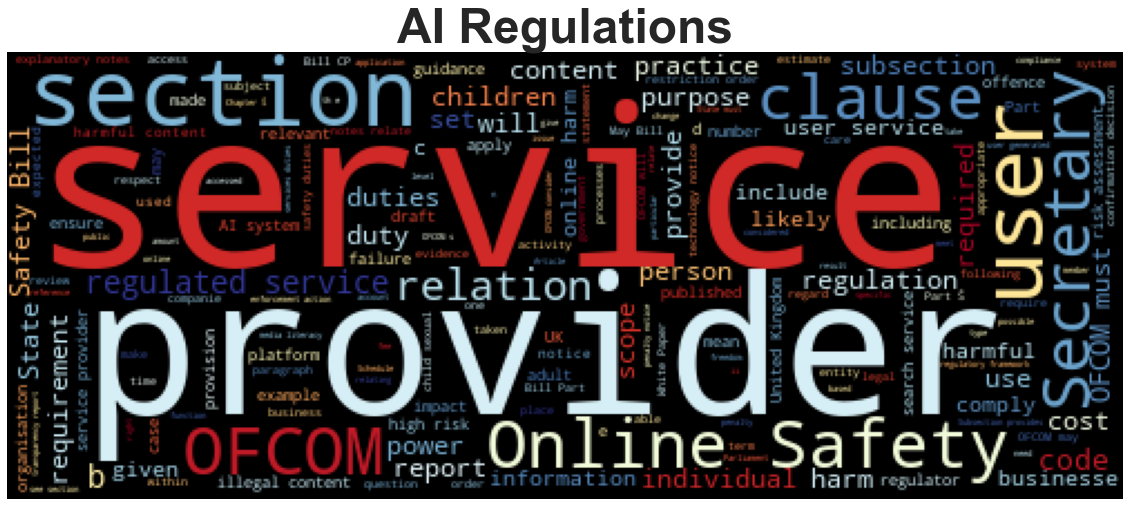

In [16]:
wordcloud(all_links.Scraped.str.cat(), title=title)

In [17]:
key_words = pd.DataFrame(Counter(all_tokens).most_common()[::-1], columns = ["Tokens", "Frequency"])

* Clean Key words to remove redundant tokens less then 75% quantile

In [23]:
display(key_words.describe())
remove =  list(key_words[ ~(key_words.Frequency < key_words.describe().iloc[6][0])]["Tokens"].values)
key_words = key_words[ ~(key_words.Frequency < key_words.describe().iloc[6][0])]
display(key_words.describe())

Frequency
count    782.000000
mean     450.139386
std      689.533220
min      105.000000
25%      147.250000
50%      221.500000
75%      482.000000
max    10457.000000

Frequency
count    196.000000
mean    1181.096939
std     1077.825891
min      483.000000
25%      606.750000
50%      851.000000
75%     1195.000000
max    10457.000000

* The redundant tokens that will be removed:

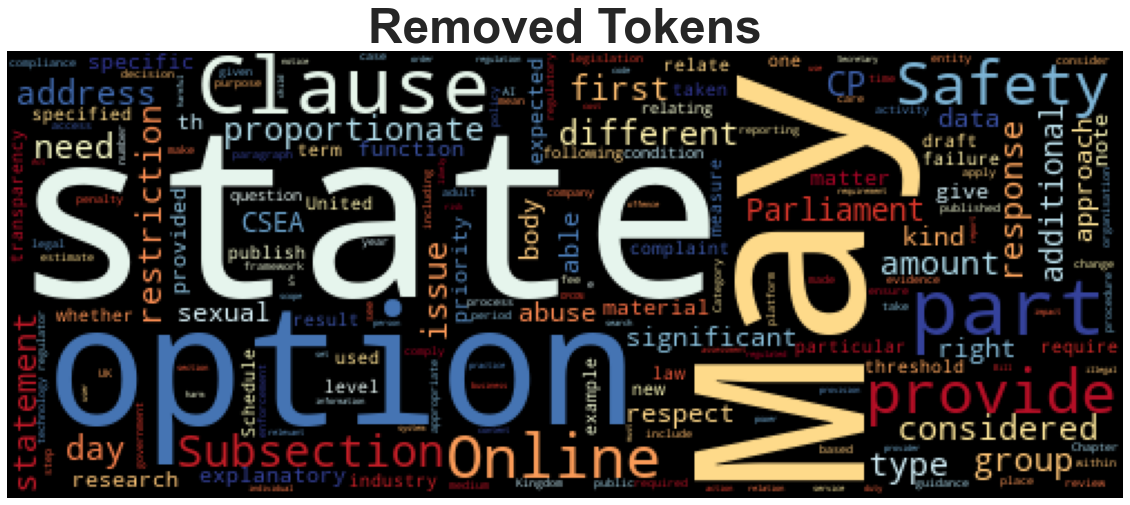

In [24]:
wordcloud(" ".join(remove), title="Removed Tokens")

* Preview Final WordCloud & Saveit

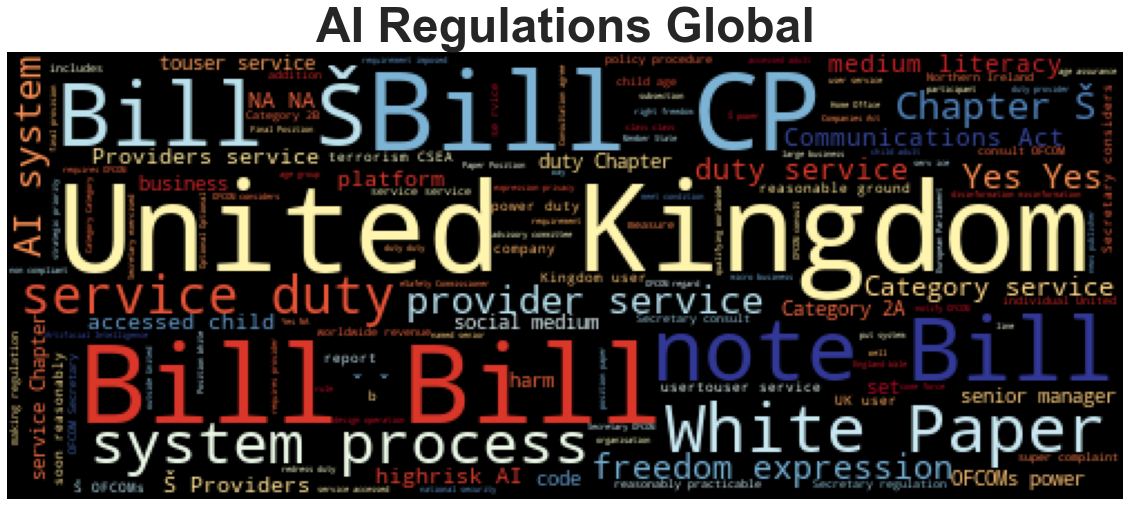

In [39]:
final_tokens = tokenizer(all_links.Scraped.str.cat(), nonfrequent = remove)
wordcloud(" ".join(final_tokens), title="%s %s"% (title, entity), save = "Yes")

* Choose the number of `top` for tokens number to save

In [26]:
top = 100

top_tokens = pd.DataFrame(token_count(final_tokens, top), columns = ["Top %d Tokens"%top, "Frequency"])
top_tokens.head()

Top 100 Tokens  Frequency
0          OFCOM       5164
1        service       4235
2           duty       2565
3           Bill       2291
4           user       2067

In [27]:
grams = ngrams(tokenizer(all_links.Scraped.str.cat()), N)
grams = pd.DataFrame(Counter(grams).most_common(top), columns = ["Top %d Ngrams(%d)"%(top,N), "Frequency"])
grams

Top 100 Ngrams(3)  Frequency
0           (Online, Safety, Bill)       1190
1   (provider, regulated, service)        540
2         (Bill, published, draft)        496
3          (published, draft, May)        496
4        (Safety, Bill, published)        496
..                             ...        ...
95      (terrorism, content, CSEA)         88
96        (content, CSEA, content)         88
97     (evidence, provide, refine)         88
98              (risk, High, risk)         85
99     (usertouser, service, duty)         84

[100 rows x 2 columns]

### Name Entity Recognition Analysis
Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in the concatenated texts from the articles that where parsed.

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [34]:
try:
    doc = nlp(all_links.Scraped.str.cat())

    # Add a title to the document
    doc.user_data["title"] = "%s NER" % entity
except:
    doc = nlp(all_links.Scraped.str.cat()[:1000000])

    # Add a title to the document
    doc.user_data["title"] = "%s NER" % entity

In [35]:
displacy.render(doc, style='ent', jupyter=True)

* Save final NERs into tabular data

In [36]:
ners = pd.DataFrame(columns =["Text", "Label Annotations"])
for i,j in enumerate(doc.ents):
    ners.loc[i,:] = (j.text, j.label_)
    
ners = ners[~ners.Text.duplicated()]

## Final Deliverable to Excel

In [37]:
writer = pd.ExcelWriter('Keywords_%s.xlsx'%entity, engine='xlsxwriter')
grams.to_excel(writer, 'Ngrams',index=False)
top_tokens.to_excel(writer, 'tokens', index=False)
ners.to_excel(writer, 'NameEntityRecognition', index=False)
writer.save()